In [1]:
import yfinance as yf
import pandas as pd

# Define the tickers for the 5 major oil companies
tickers = ['XOM', 'CVX', 'BP', 'SHEL', 'TOT']

# Download historical data from 2020-01-01
oil_data = yf.download(tickers, start='2020-01-01')

# Display the first few rows
oil_data.head()


C:\Users\tamas\AppData\Local\Temp\ipykernel_5636\3804268720.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  oil_data = yf.download(tickers, start='2020-01-01')
[*********************100%***********************]  5 of 5 completed


Price           Close                                            High  \
Ticker             BP        CVX       SHEL TOT        XOM         BP   
Date                                                                    
2020-01-02  27.880396  93.955620  47.659271 NaN  54.131069  27.887707   
2020-01-03  28.384781  93.630653  48.034229 NaN  53.695881  28.574840   
2020-01-06  29.130404  93.313423  48.632557 NaN  54.108173  29.298536   
2020-01-07  28.823391  92.121834  48.185802 NaN  53.665348  28.859940   
2020-01-08  28.384781  91.069572  47.619373 NaN  52.856064  28.728350   

Price                                            ...       Open             \
Ticker            CVX       SHEL TOT        XOM  ...         BP        CVX   
Date                                             ...                         
2020-01-02  94.110366  47.683204 NaN  54.222684  ...  27.807297  93.475897   
2020-01-03  94.953753  48.145918 NaN  54.489906  ...  28.128929  94.226433   
2020-01-06  94.141328  48.800090 NaN  54.482279  ...  29.006135  93.808618   
2020-01-07  92.640246  48.209735 NaN  53.840946  ...  28.772221  92.090883   
2020-01-08  92.145075  47.810841 NaN  53.665356  ...  28.684491  91.727259   

Price                                   Volume                                  
Ticker           SHEL TOT        XOM        BP      CVX     SHEL TOT       XOM  
Date                                                                            
2020-01-02  47.435891 NaN  53.627166   6565100  5205000  3085246 NaN  12456400  
2020-01-03  47.770964 NaN  54.466996  14000800  6360900  3713515 NaN  17386900  
2020-01-06  48.632557 NaN  53.688254  15091700  9953000  3250736 NaN  20081900  
2020-01-07  48.145911 NaN  53.825679  12494200  7856900  2683199 NaN  17387700  
2020-01-08  47.715109 NaN  53.527928   9335500  7295900  2966175 NaN  15137700  

[5 rows x 25 columns]

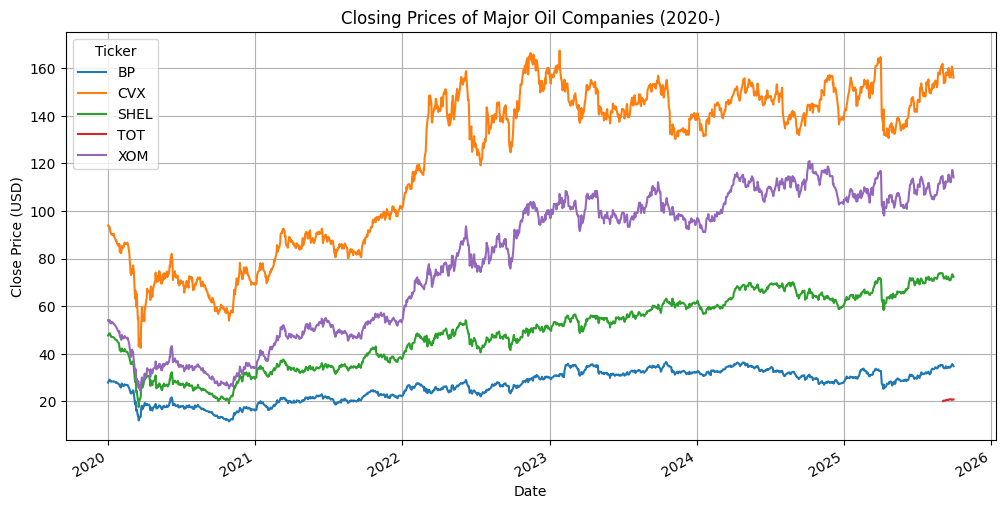

In [2]:
import matplotlib.pyplot as plt

# Plot the closing prices for each company
oil_data['Close'].plot(figsize=(12, 6))
plt.title('Closing Prices of Major Oil Companies (2020-)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend(title='Ticker')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

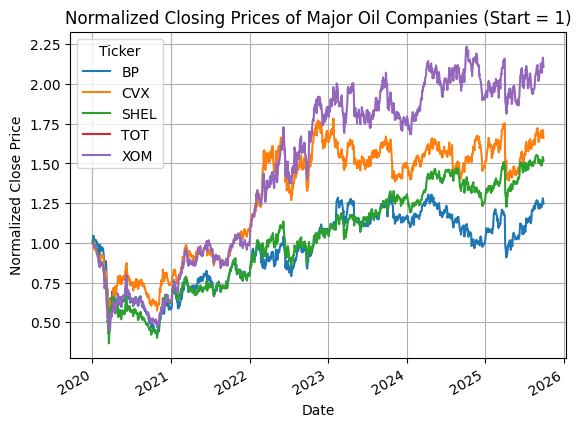

In [6]:
# Normalize all columns so that their first value (at the start date) is 1
normalized_oil_data = oil_data / oil_data.iloc[0]
normalized_oil_data.head()

# Plot the normalized closing prices for each company
plt.figure(figsize=(12, 6))
normalized_oil_data['Close'].plot()
plt.title('Normalized Closing Prices of Major Oil Companies (Start = 1)')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.legend(title='Ticker')
plt.grid(True)
plt.show()



In [8]:
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\tamas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Correlation matrix of closing prices:
Ticker        BP       CVX      SHEL       TOT       XOM
Ticker                                                  
BP      1.000000  0.901314  0.919840  0.376361  0.925432
CVX     0.901314  1.000000  0.892014  0.302588  0.959316
SHEL    0.919840  0.892014  1.000000 -0.293470  0.957522
TOT     0.376361  0.302588 -0.293470  1.000000  0.578416
XOM     0.925432  0.959316  0.957522  0.578416  1.000000


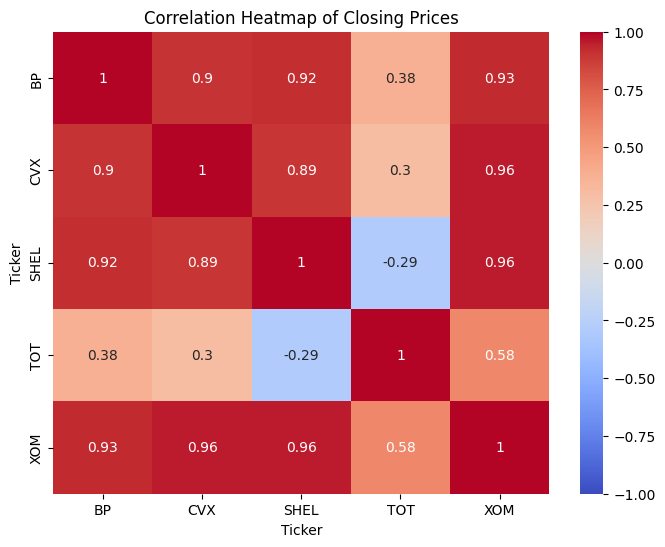

In [9]:

# Calculate the correlation matrix of the closing prices
close_corr = oil_data['Close'].corr()

# Display the correlation matrix
print("Correlation matrix of closing prices:")
print(close_corr)

# Plot the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(close_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Closing Prices')
plt.show()
